In [1]:
#Hotel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib.image import imread
%matplotlib inline
import seaborn as sns
sns.set_theme() # pour modifier le thème

import re
df = pd.read_csv('hotel_bookings.csv',header=0 )
db = pd.read_csv('Hotel_Reviews.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [2]:
dfr = df[df.country == 'FRA']
dfr.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,9810.000000,194.000000,10415.000000,10415.000000,10415.000000,10415.000000
mean,0.185694,82.322132,2016.245223,26.941143,15.295151,0.972636,2.536438,1.948248,0.116275,0.007393,0.007489,0.006145,0.020931,0.218051,54.313456,180.469072,2.309265,109.617276,0.055401,0.727028
std,0.388878,77.550411,0.666325,13.984603,8.605164,0.913968,1.610829,0.451520,0.414843,0.085669,0.086220,0.229730,0.412201,0.617258,93.579464,119.131319,21.927243,43.325575,0.229191,0.815218
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,2016.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,71.250000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,59.000000,2016.000000,27.000000,15.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,153.000000,0.000000,100.850000,0.000000,1.000000
75%,0.000000,123.000000,2017.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,277.000000,0.000000,132.550000,0.000000,1.000000
max,1.000000,479.000000,2017.000000,53.000000,31.000000,8.000000,21.000000,4.000000,3.000000,1.000000,1.000000,13.000000,21.000000,13.000000,508.000000,498.000000,379.000000,378.000000,2.000000,5.000000


In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


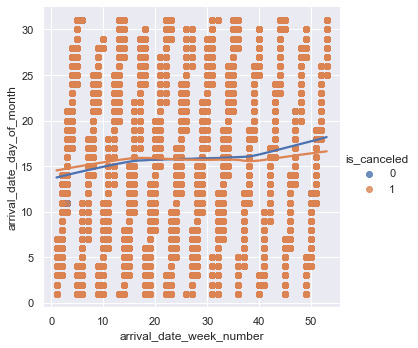

In [4]:
sns.lmplot(x='arrival_date_week_number', y='arrival_date_day_of_month', lowess=True, hue='is_canceled', data=df);


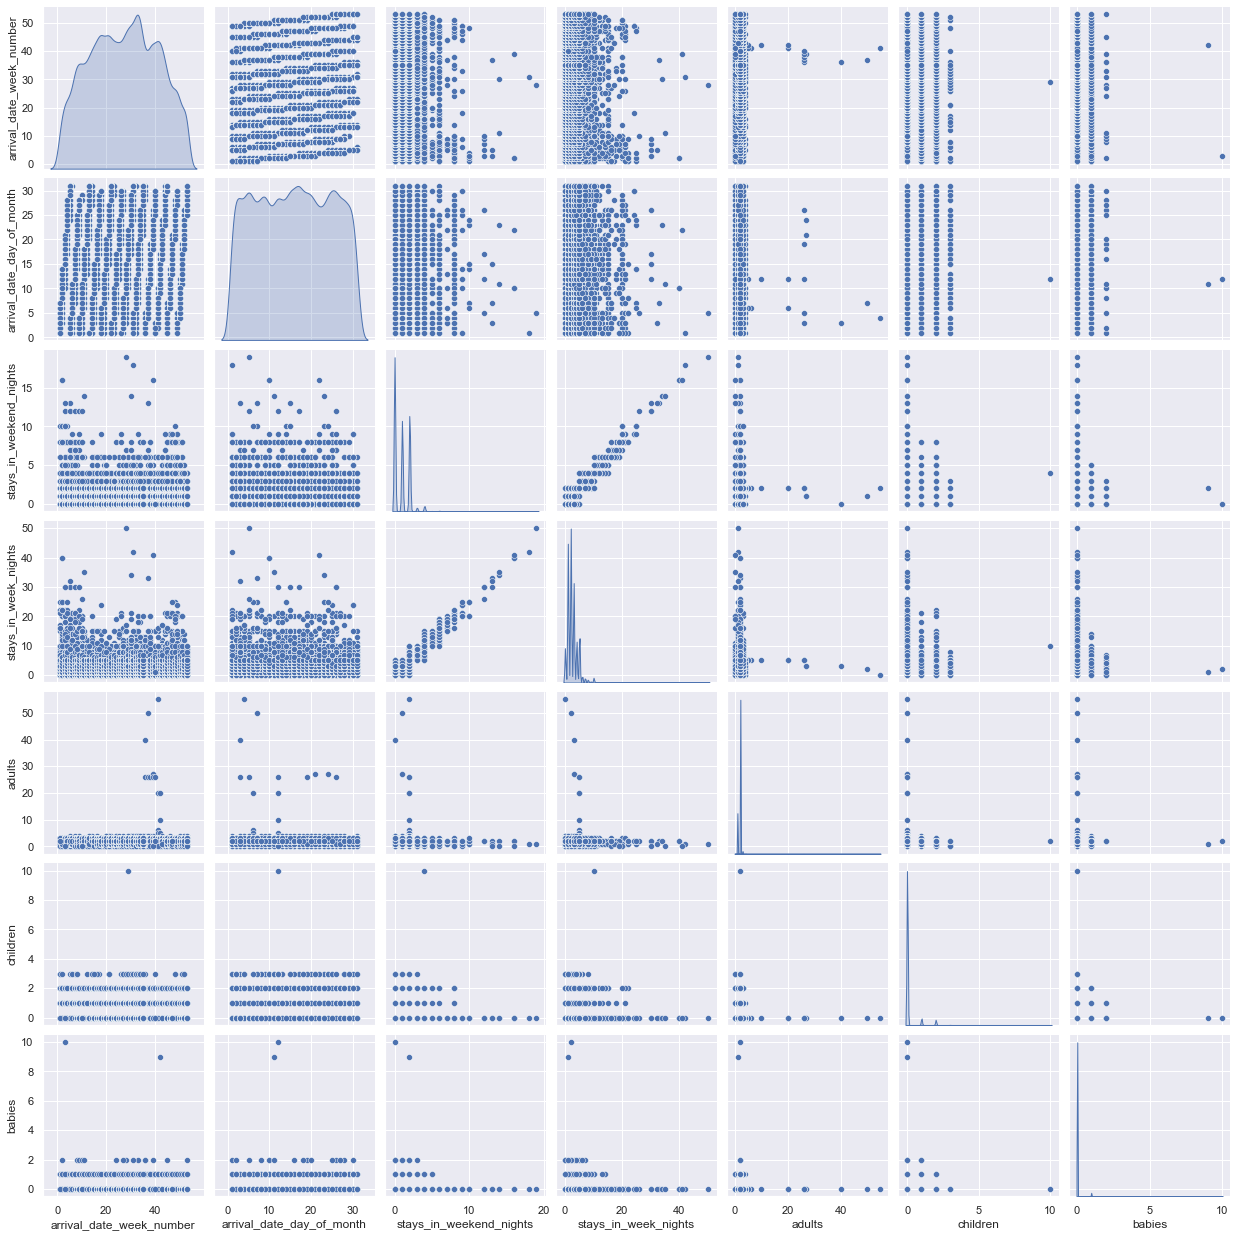

In [5]:
sns.pairplot(df.iloc[:,5:13], diag_kind='kde');

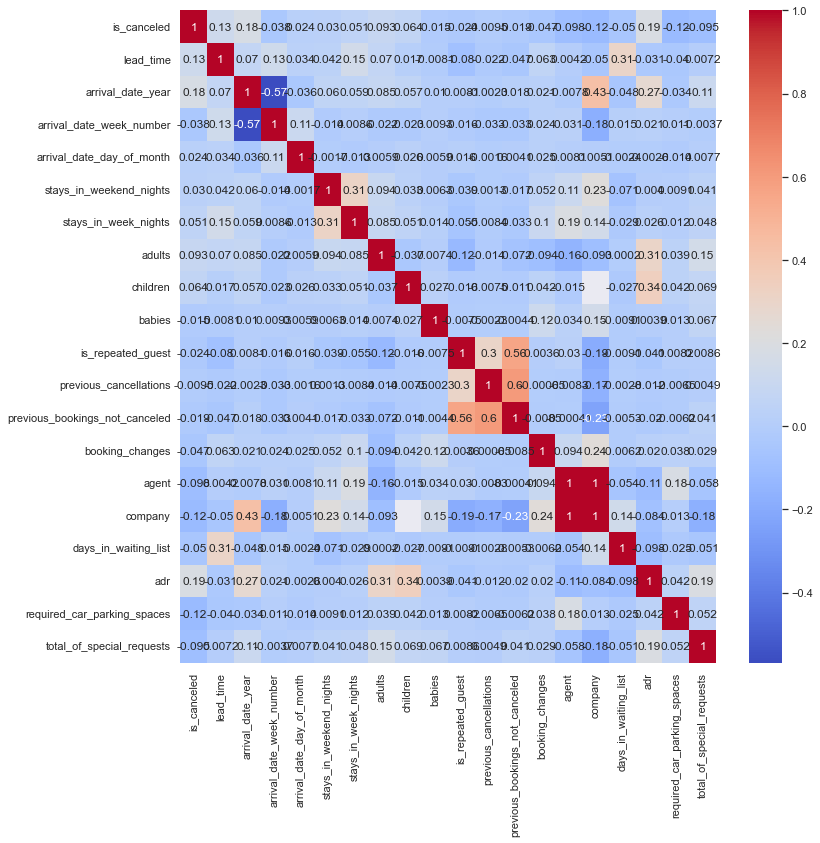

In [6]:
cor = dfr.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

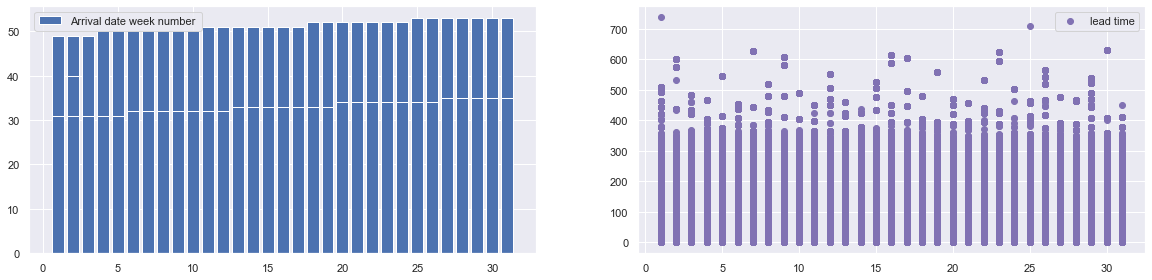

In [32]:
x = df['arrival_date_day_of_month']      # abscisses des points des deux nuages
y1 = df['arrival_date_week_number']     # ordonnées des points du premier nuage
y2 = df['lead_time']   # ordonnées des points du second nuage

fig = plt.figure(figsize=(20,10))

plt.subplot(221)
plt.bar(x, y1, label = "Arrival date week number ")
plt.legend()

plt.subplot(222)
plt.scatter(x, y2, c = 'm', label = "lead time",)
plt.legend()


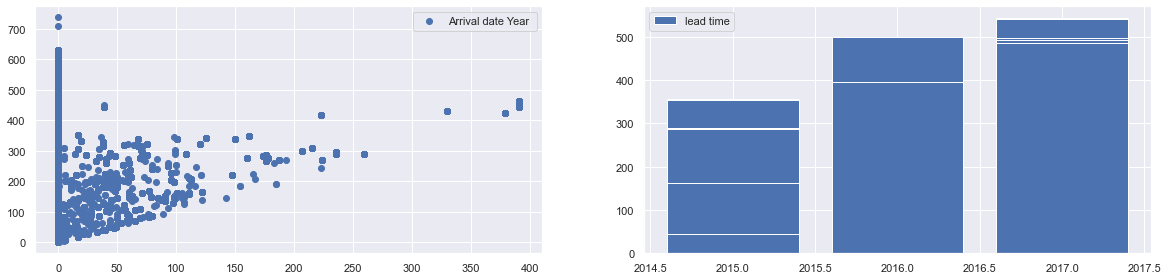

In [33]:
x = df['days_in_waiting_list']  # abscisses des points des deux nuages
x1 = df['arrival_date_year']
y1 = df['lead_time']     # ordonnées des points du premier nuage
y2 = df['company']   # ordonnées des points du second nuage

fig = plt.figure(figsize=(20,10))

plt.subplot(221)
plt.scatter(x, y1, label = "Arrival date Year ")
plt.legend()

plt.subplot(222)
plt.bar(x1, y2, label = "lead time",)
plt.legend()


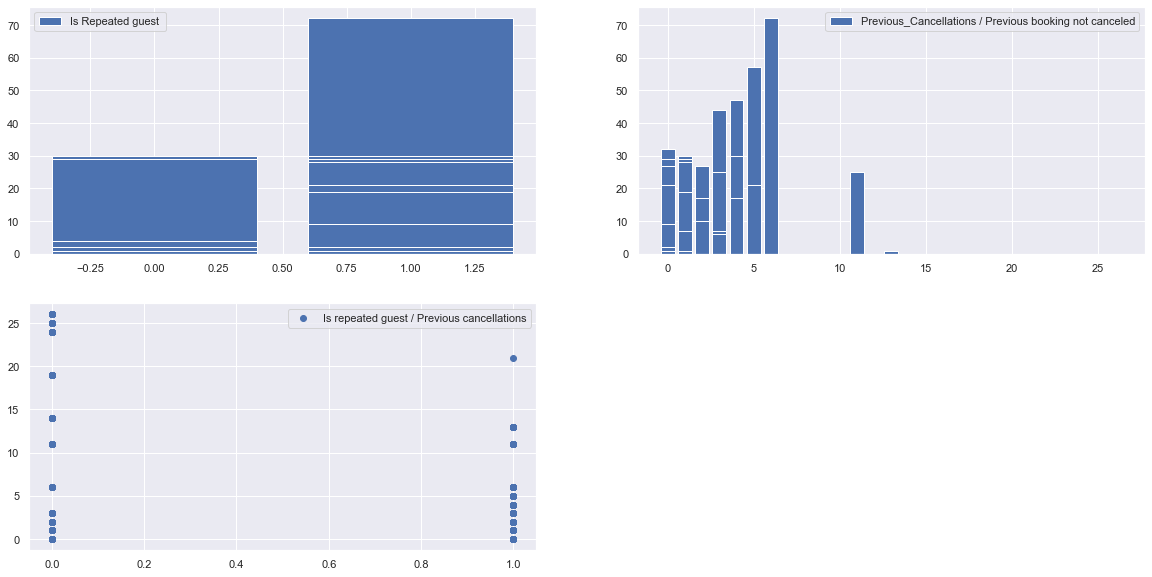

In [31]:
x = df['is_repeated_guest']  # abscisses des points des deux nuages
x1 = df['previous_cancellations']
y1 = df['previous_bookings_not_canceled']     # ordonnées des points du premier nuage
y2 = df['previous_cancellations']   # ordonnées des points du second nuage

fig = plt.figure(figsize=(20,10))

plt.subplot(221)
plt.bar(x, y1, label = "Is Repeated guest ")
plt.legend()

plt.subplot(222)
plt.bar(x1, y1, label = "Previous_Cancellations / Previous booking not canceled",)
plt.legend()

plt.subplot(223)
plt.scatter(x, y2, label = "Is repeated guest / Previous cancellations",)
plt.legend()

In [8]:
Rfr = db[db['Hotel_Address'].apply(lambda row: 'France' in row)]
Rfr['Positive_Review'] = Rfr['Positive_Review'].astype('str')
Rfr['Positive_Review']
#Positive words : Windows, Bathroom, email, help me, helpful, quiet, otherwise, needs, problem, managed, friends, forgot, recomend
Rfr.Negative_Review[3784]
#Negative words : Not only, credit card, unacceptable, delete, shame, cleaning, noise, maintenance, small

/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_10660/2438888162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rfr['Positive_Review'] = Rfr['Positive_Review'].astype('str')


' lift wasn t working to 6th floor as under maintenance room service dinners aren t the greatest '

In [9]:
B = []
for liste in Rfr['Positive_Review'] :
    B.append(liste)
Rfr = Rfr.drop_duplicates()

In [10]:
txt = Rfr['Positive_Review']
r = re.compile('[a-zA-Z0-9.-]+')
pointeur = r.findall(B[0])
print(pointeur)

['Nice', 'hotel', 'Room', 'was', 'beautiful', 'and', 'bed', 'very', 'comfortable', 'Did', 'not', 'expect', 'big', 'rooms', 'in', 'Paris', 'so', 'size', 'was', 'really', 'ok', 'with', '2', 'windows', 'Bathroom', 'modern', 'and', 'new', 'with', 'a', 'GREAT', 'shower', 'Staff', 'was', 'wonderfull', 'since', 'reservation', 'They', 'sent', 'me', 'an', 'email', 'prior', 'to', 'my', 'arrival', 'asking', 'if', 'they', 'could', 'help', 'me', 'in', 'anyway', 'and', 'also', 'asking', 'if', 'I', 'had', 'any', 'special', 'needs', 'such', 'as', 'extra', 'beds', 'I', 'had', 'a', 'last', 'minute', 'health', 'problem', 'in', 'the', 'family', 'and', 'had', 'to', 'arrive', 'one', 'day', 'earlier', 'and', 'stay', 'for', '1', 'night', 'less', 'Audrey', 'was', 'wonderful', 'and', 'managed', 'to', 'receive', 'me', 'before', 'and', 'dealt', 'herself', 'with', 'Booking', 'to', 'change', 'my', 'reservation', 'I', 'sent', 'a', 'note', 'to', 'her', 'when', 'I', 'was', 'entering', 'my', 'flight', 'from', 'Cannes',

In [11]:
def findQuote(tweet):
    r = re.compile(r"[ a-zA-Z0-9-]+")
    quote = r.findall(tweet)
    return len(quote)
def removeQuote(tweet):
    r = re.compile(r"[ a-zA-Z0-9-]+")
    quote = r.findall(tweet)
    return r.sub('', tweet)
def findLTIR(tweet):
    r = re.compile(r"Windows[a-zA-Z0-9-]+")
    quote = r.findall(tweet)
    return len(quote)
def findmatter(tweet):
    r = re.compile(r"phone [a-zA-Z0-9-]+")
    quote = r.findall(tweet)
    return len(quote)

In [12]:
Rfr['Rfr'] = Rfr['Positive_Review'].apply(lambda x: findQuote(x))
Rfr.text = Rfr['Positive_Review'].apply(lambda x: removeQuote(x))
Rfr['windows'] = Rfr['Positive_Review'].apply(lambda x: findLTIR(x))
Rfr['help'] = Rfr['Positive_Review'].apply(lambda x: findmatter(x))

/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_10660/1488969924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rfr['Rfr'] = Rfr['Positive_Review'].apply(lambda x: findQuote(x))
/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_10660/1488969924.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Rfr.text = Rfr['Positive_Review'].apply(lambda x: removeQuote(x))
/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_10660/1488969924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [13]:
Rfr['help'].sum()

286

In [14]:
txt = Rfr['Negative_Review']
r = re.compile('[a-zA-Z0-9.-]+')
pointeur = r.findall(B[0])
print(pointeur)

['Nice', 'hotel', 'Room', 'was', 'beautiful', 'and', 'bed', 'very', 'comfortable', 'Did', 'not', 'expect', 'big', 'rooms', 'in', 'Paris', 'so', 'size', 'was', 'really', 'ok', 'with', '2', 'windows', 'Bathroom', 'modern', 'and', 'new', 'with', 'a', 'GREAT', 'shower', 'Staff', 'was', 'wonderfull', 'since', 'reservation', 'They', 'sent', 'me', 'an', 'email', 'prior', 'to', 'my', 'arrival', 'asking', 'if', 'they', 'could', 'help', 'me', 'in', 'anyway', 'and', 'also', 'asking', 'if', 'I', 'had', 'any', 'special', 'needs', 'such', 'as', 'extra', 'beds', 'I', 'had', 'a', 'last', 'minute', 'health', 'problem', 'in', 'the', 'family', 'and', 'had', 'to', 'arrive', 'one', 'day', 'earlier', 'and', 'stay', 'for', '1', 'night', 'less', 'Audrey', 'was', 'wonderful', 'and', 'managed', 'to', 'receive', 'me', 'before', 'and', 'dealt', 'herself', 'with', 'Booking', 'to', 'change', 'my', 'reservation', 'I', 'sent', 'a', 'note', 'to', 'her', 'when', 'I', 'was', 'entering', 'my', 'flight', 'from', 'Cannes',

In [15]:
#Negative words : Not only, credit card, unacceptable, delete, shame, cleaning, noise, maintenance, small
def findmatter(tweet):
    r = re.compile(r"cleaning [a-zA-Z0-9-]+")
    quote = r.findall(tweet)
    return len(quote)
Rfr['problem'] = Rfr['Negative_Review'].apply(lambda x: findmatter(x))

/var/folders/7f/1dyw4vh16jx3zq7t266nc56m0000gn/T/ipykernel_10660/3179179694.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rfr['problem'] = Rfr['Negative_Review'].apply(lambda x: findmatter(x))


In [16]:
Rfr['problem'].sum()

461